## 지도학습 회귀 미리보기

##### 최근접이웃 모델 한계
1. 용량이 큰 데이터를 메모리에 로드할 때 문제
2. 메모리에 로드된 데이터포인트만 대상으로 예측해서 한계점에 취약

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 농어 무게 예측
- k최근점이웃 회귀모델 사용, 길이값으로 무게 예측

In [4]:
# 데이터 준비
# - 입력: 길이
# - 라벨(정답): 무게
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

perch_length.shape, perch_weight.shape

((56,), (56,))

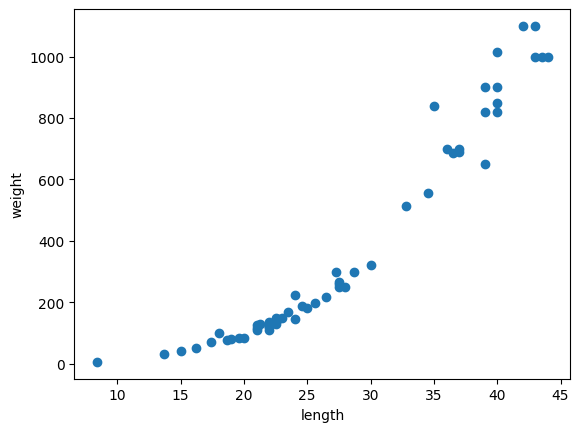

In [5]:
# 데이터 시각화
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [21]:
# 훈련-테스트 데이터 분리
from sklearn.model_selection import train_test_split
train_input, test_input, train_label, test_label = train_test_split(perch_length, perch_weight, random_state=42)

# train할 때 input은 2차원인데 현재 1차원임
print(train_input.shape)

# 배치차원 추가해서 2차원으로 만듦
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)
print(train_input.shape, test_input.shape)

(42,)
(42, 1) (14, 1)


In [22]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
knr.fit(train_input, train_label)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


##### 평가 - 결정계수 $R^2$

$$
    결정계수 = 1 - \frac{(실제값-예측)^2의 합}{(실제값-평균)^2의 합}
$$
- 0 ~ 1 사이의 값을 반환하고, 1에 가까울수록 정확하다는 뜻

In [23]:
knr.score(test_input, test_label)

0.992809406101064

##### 예측

In [28]:
pred = knr.predict([[30]])
print(pred)

distance, index =knr.kneighbors([[30]])
print(f"distances: {distance}, indices: {index}")
print(f"이웃평균값 {train_label[index].mean()}")

[311.4]
distances: [[1.3 2.5 2.5 2.8 3.5]], indices: [[28 13 18 20 21]]
이웃평균값 311.4


**컬럼이 하나인 경우**

$y = wx + b$

1. 회귀계수 (= 기울기, 가중치, weight, coefficient)
2. 절편 (= 편향, bias, intercept)

In [35]:
from sklearn.linear_model import LinearRegression

# sklearn은 2차원 입력을 요구
X = perch_length.reshape(-1, 1)
y = perch_weight

# 선형회귀 모델 학습
lr = LinearRegression()
lr.fit(X, y)

w = lr.coef_[0]   # 기울기
b = lr.intercept_ # 절편

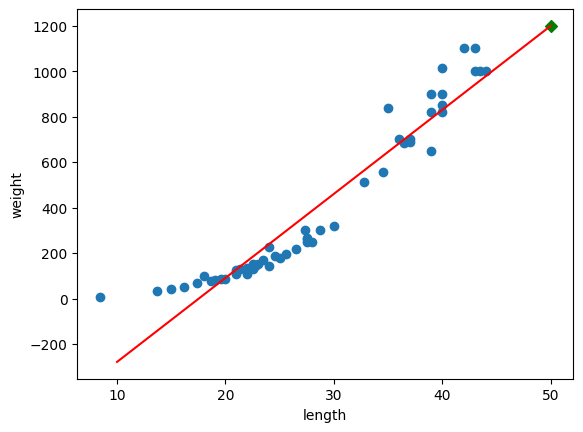

In [36]:
# 시각화
plt.scatter(perch_length, perch_weight)
plt.plot([10, 50], [w * 10 + b, w * 50 + b], color='red')
plt.scatter(50, w * 50 + b, color='green', marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [37]:
lr.score(test_input, test_label)

0.8488025585957805

**컬럼이 여러 개인 경우**

$ y = w_1x_1 + w_2x_2 + w_3x_3 + ... + b $

1. 회귀 계수 여러 개
2. 절편 한 개

In [41]:
df = pd.DataFrame(pd.read_csv('../../01_python_basic/data/perch_full.csv'))
df.describe()

,length,height,width
count,56.000000,56.000000,56.000000
mean,27.892857,7.862143,4.745536
std,9.021668,2.878343,1.775006
min,8.400000,2.110000,1.410000
25%,21.825000,5.690000,3.520000
50%,25.300000,6.920000,4.155000
75%,36.625000,10.850000,6.450000
max,44.000000,12.800000,8.140000


In [50]:
perch_full = df.to_numpy()
perch_weight.shape

(56,)

In [51]:
train_input, test_input, train_label, test_label = train_test_split(perch_full, perch_weight, random_state=42)

In [52]:
# 훈련
lr = LinearRegression()
lr.fit(train_input, train_label)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
# 가중치, 절편
print(f"가중치는 3개: {lr.coef_}, 인터셉트는 1개: {lr.intercept_}")
w1, w2, w3 = lr.coef_
b = lr.intercept_
x1, x2, x3 = 20.0, 5.08, 2.77
y = w1 * x1 + w2 * x2 + w3 * x3 + b
print(f"\ny = {y}\n")

# 예측
pred = lr.predict(test_input)
print(pred)

# 평가
# 선형회귀이기 때문에 모든 점들이 선 위에 있진 않음. 
# 다른 말로, 선형회귀는 테스트 데이터로도 100점이 안 나옴.
print(f"scores(테스트, 훈련) = {lr.score(test_input, test_label)}, {lr.score(train_input, train_label)}")



가중치는 3개: [ 9.07538153 69.46401443 38.00385678], 인터셉트는 1개: -599.1708082981097

y = 40.484698833552216

[-322.78309496   52.96101903  329.77783424  171.46884473  149.65836217
  789.639144    383.68482432  250.05247716  813.2470793   126.13660027
  980.20626415  -33.35965799  357.76466578  421.8675313 ]
scores(테스트, 훈련) = 0.8796419177546367, 0.9559326821885706


In [57]:
# plt.scatter(train_input)
train_input

array([[19.6 ,  5.14,  3.04],
       [22.  ,  5.88,  3.52],
       [18.7 ,  5.2 ,  3.12],
       [17.4 ,  4.59,  2.94],
       [36.  , 10.61,  6.74],
       [25.  ,  6.44,  3.68],
       [40.  , 11.93,  7.11],
       [39.  , 12.43,  7.35],
       [43.  , 11.93,  7.28],
       [22.  ,  5.64,  3.52],
       [20.  ,  5.08,  2.77],
       [22.  ,  6.11,  3.52],
       [24.  ,  7.29,  3.72],
       [27.5 ,  7.17,  4.34],
       [43.  , 12.51,  7.42],
       [40.  , 11.73,  7.22],
       [24.  ,  6.38,  3.82],
       [21.  ,  5.92,  3.31],
       [27.5 ,  7.05,  4.34],
       [40.  , 12.38,  7.46],
       [32.8 , 10.03,  6.02],
       [26.5 ,  7.17,  4.14],
       [36.5 , 10.88,  6.86],
       [13.7 ,  3.53,  2.  ],
       [22.7 ,  5.95,  3.63],
       [15.  ,  3.82,  2.43],
       [37.  , 10.57,  6.37],
       [35.  , 11.49,  7.8 ],
       [28.7 ,  7.59,  4.64],
       [23.5 ,  6.28,  3.72],
       [39.  , 11.14,  6.  ],
       [21.  ,  5.69,  3.56],
       [23.  ,  5.22,  3.63],
       [22

##### 특성공학 (Feature Engineering)
- 기계학습 성능 향상을 위해 기존 데이터에서 새로운 특성을 만들거나 기존 특성을 변환하는 전처리
    - 특성 생성
    - 특성 변환
    - 결측치 처리
    - 차원 축소
    - 범주형 데이터 처리(인코딩)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# 기본값이 2
poly = PolynomialFeatures(include_bias=True, degree=2)
poly.fit([[4, 5]])
poly.transform([[4, 5]])


array([[ 1.,  4.,  5., 16., 20., 25.]])

In [75]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x0^2', 'x0 x1', 'x1^2'], dtype=object)

In [79]:
poly = PolynomialFeatures(include_bias=False, degree=2)
poly.fit(perch_full)
poly_perch = poly.transform(perch_full)
poly_perch

array([[8.400000e+00, 2.110000e+00, 1.410000e+00, 7.056000e+01,
        1.772400e+01, 1.184400e+01, 4.452100e+00, 2.975100e+00,
        1.988100e+00],
       [1.370000e+01, 3.530000e+00, 2.000000e+00, 1.876900e+02,
        4.836100e+01, 2.740000e+01, 1.246090e+01, 7.060000e+00,
        4.000000e+00],
       [1.500000e+01, 3.820000e+00, 2.430000e+00, 2.250000e+02,
        5.730000e+01, 3.645000e+01, 1.459240e+01, 9.282600e+00,
        5.904900e+00],
       [1.620000e+01, 4.590000e+00, 2.630000e+00, 2.624400e+02,
        7.435800e+01, 4.260600e+01, 2.106810e+01, 1.207170e+01,
        6.916900e+00],
       [1.740000e+01, 4.590000e+00, 2.940000e+00, 3.027600e+02,
        7.986600e+01, 5.115600e+01, 2.106810e+01, 1.349460e+01,
        8.643600e+00],
       [1.800000e+01, 5.220000e+00, 3.320000e+00, 3.240000e+02,
        9.396000e+01, 5.976000e+01, 2.724840e+01, 1.733040e+01,
        1.102240e+01],
       [1.870000e+01, 5.200000e+00, 3.120000e+00, 3.496900e+02,
        9.724000e+01, 5.834400

In [80]:
train_input, test_input, train_label, test_label = train_test_split(poly_perch, perch_weight, random_state=42)

In [81]:
lr = LinearRegression()
lr.fit(train_input, train_label)
lr.score(test_input, test_label)

0.9714559911594125

##### 특성을 2차부터 5차까지 늘려보기

In [4]:

def test_poly_feature(degree):
    # 특성 추가
    poly = PolynomialFeatures(include_bias=False, degree=degree)
    poly_perch = poly.fit_transform(perch_full)

    # 훈련-테스트 분리
    train_input, test_input, train_label, test_label = train_test_split(poly_perch, perch_weight, random_state=42)

    # 학습
    lr = LinearRegression()
    lr.fit(train_input, train_label)

    # 평가
    return lr.score(train_input, train_label), lr.score(test_input, test_label)

In [5]:
for i in range(2, 6):
    print(test_poly_feature(i))

NameError: name 'PolynomialFeatures' is not defined

In [82]:
perch_full

array([[ 8.4 ,  2.11,  1.41],
       [13.7 ,  3.53,  2.  ],
       [15.  ,  3.82,  2.43],
       [16.2 ,  4.59,  2.63],
       [17.4 ,  4.59,  2.94],
       [18.  ,  5.22,  3.32],
       [18.7 ,  5.2 ,  3.12],
       [19.  ,  5.64,  3.05],
       [19.6 ,  5.14,  3.04],
       [20.  ,  5.08,  2.77],
       [21.  ,  5.69,  3.56],
       [21.  ,  5.92,  3.31],
       [21.  ,  5.69,  3.67],
       [21.3 ,  6.38,  3.53],
       [22.  ,  6.11,  3.41],
       [22.  ,  5.64,  3.52],
       [22.  ,  6.11,  3.52],
       [22.  ,  5.88,  3.52],
       [22.  ,  5.52,  4.  ],
       [22.5 ,  5.86,  3.62],
       [22.5 ,  6.79,  3.62],
       [22.7 ,  5.95,  3.63],
       [23.  ,  5.22,  3.63],
       [23.5 ,  6.28,  3.72],
       [24.  ,  7.29,  3.72],
       [24.  ,  6.38,  3.82],
       [24.6 ,  6.73,  4.17],
       [25.  ,  6.44,  3.68],
       [25.6 ,  6.56,  4.24],
       [26.5 ,  7.17,  4.14],
       [27.3 ,  8.32,  5.14],
       [27.5 ,  7.17,  4.34],
       [27.5 ,  7.05,  4.34],
       [27

### 과대적합 & 과소적합

**과대적합 (overfitting)**
- 모델이 훈련 데이터에 지나치게 최적화되어 새로운 데이터에 일반화 되지 않은 상태
- 훈련 데이터에 대한 평가는 좋지만 테스트 데이터에 대한 평가가 떨어지는 상태
- 훈련 데이터의 잡음까지 학습된 상태
- 해결 방법
    - 데이터셋의 복잡도 줄이기
    - 학습할 데이터의 양을 늘이기
    - L1, L2가 적용된 규제 모델 사용하기

**과소적합 (underfitting)**
- 모델 훈련이 덜 된 상태
- 속성을 제대로 분석하지 못한 상태
- 훈련 데이터에 대한 평가조차 좋지 않은 상태
- 해결 방법
    - 학습할 데이터를 추가 제공하기
    - 특성을 추가해 복잡한 패턴을 학습시키기